<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Aula 14 - Modelos ARIMA - Como Determinar os Valores de p, d e q</font></b></strong>

O que significam p, d e q no modelo ARIMA?

Um modelo ARIMA requer 3 parâmetros:

- param q: (int) Ordem do modelo MA.
- param p: (int) Ordem do modelo de AR.
- param d: (int) Número de vezes que os dados precisam ser diferenciados.

Nesta aula, vamos estudar como determinar o valor desses 3 parâmetros.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [3]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.

!pip install -q -U watermark

You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [1]:
# Package to calculate 

!pip install pmdarima==1.5.3
!pip install sklearn==0.23.2
!pip install matplotlib==3.3.1
!pip install pandas==1.1.1
!pip install numpy==1.18.2
!pip install statsmodels==0.11.1

You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement sklearn==0.23.2 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==0.23.2
You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.3.1-1-cp37-cp37m-win_amd64.whl (8.9 MB)


You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached pandas-1.1.1-cp37-cp37m-win_amd64.whl (9.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached statsmodels-0.11.1-cp37-none-win_amd64.whl (8.2 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
# The new versions of Pandas and Matplotlib bring several warning messages to the developer. Let's disable this.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports for data manipulation
import numpy as np
import pandas as pd
from datetime import datetime

# Imports for data Vasualization
import matplotlib.pyplot as plt
import matplotlib as m

# Imports for predictive modeling
import pmdarima
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from pandas.plotting import autocorrelation_plot

# Imports for metrics and model performance
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports for formatting graphics
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

In [5]:
#Versions of packages used in this jupyter notebook
%reload_ext watermark
%watermark -a "Data Scientist Rodolfo Terra" --iversions

Author: Data Scientist Rodolfo Terra

pmdarima   : 1.5.3
numpy      : 1.18.2
sys        : 3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]
matplotlib : 3.3.1
pandas     : 1.1.1
statsmodels: 0.11.1
sklearn    : 0.23.2



## Definição do Problema de Negócio

A HappyMoonVC é uma Venture Capital (VC).

Venture Capital (VC) é um tipo de fundo de investimento focado em capital de crescimento para empresas de médio porte que já possuem carteira de clientes e receita, mas que ainda precisam dar um salto de crescimento. 

VCs investem em empresas iniciantes, Startups e emergentes que foram consideradas com alto potencial de crescimento ou que demonstraram alto crescimento (em termos de número de funcionários, receita anual ou ambos).

A HappyMoonVC está analisando um novo e promissor negócio sugerido por uma Startup, o GoInRail.

O GoInRail é um método de transporte inovador que usa a tecnologia de propulsão a jato para executar um veículo similar a um Drone, mas sobre trilhos (que mantém o Drone carregado com energia elétrica) e transportar pessoas em alta velocidade!

O investimento só fará sentido se o GoInRail conseguir mais de 1 milhão de usuários mensais nos próximos 18 meses.

Nosso trabalho é analisar dados de séries temporais com a demanda de transporte em uma determinada região e prever a demanda pelo GoInRail, que ajude a HappyMoonVC a tomar sua decisão de investimento.

## Conjunto de Dados

Usaremos conjuntos de dados fictícios que mostram a demanda de clientes por transporte em uma determinada região. Para cada dia da semana, foi contabilizado quantas pessoas usaram o sistema de transporte na região. Os dados tem registros dos anos de 2017, 2018 e 2019.

São fornecidos 2 datasets:

- O primeiro possui 3 colunas, com id, data e total de clientes que usaram algum tipo de transporte. Será nossos dados de treino.

- O segundo possui 2 colunas, com id e data para os anos de 2019 e 2020. Será nosso dataset de teste.

In [6]:
# Load the data
dados_treino = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset4.csv")
dados_teste = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset5.csv")

Vamos fazer algumas transformações nos dados para criar o modelo.

In [7]:
# Convert the Datetime column to the correct type
dados_treino['Datetime'] = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%Y %H:%M')

In [8]:
# Convert the Datetime column to the correct type
dados_teste['Datetime'] = pd.to_datetime(dados_teste.Datetime, format = '%d-%m-%Y %H:%M')

In [9]:
# Let's extract the details from the Datetime column: year, moth, day and time

for i in (dados_treino, dados_teste):
    i['ano'] = i.Datetime.dt.year
    i['mes'] = i.Datetime.dt.month
    i['dia'] = i.Datetime.dt.day
    i['hora'] = i.Datetime.dt.hour

In [10]:
# We need the day of the week too
dados_treino['dia_semana'] = dados_treino['Datetime'].dt.dayofweek

In [11]:
# It would be good to check if the fact that it is a weekend or not impacts the use of transportation.
# Let's extract this information. Days of the week equal to 5 or 6 are Saturday and Sunday.

# We created a function, where we mark weekends as 1 and working days as 0

def converteFimSemana(registro):
    if registro.dayofweek == 5 or registro.dayofweek == 6:
        return 1
    else:
        return 0

In [12]:
# Now we apply the function
dados_treino['final_semana'] = dados_treino['Datetime'].apply(converteFimSemana)

In [13]:
# Let's see how the dataset looks
dados_treino.head()

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana,final_semana
0,0,2017-08-25 00:00:00,8,2017,8,25,0,4,0
1,1,2017-08-25 01:00:00,2,2017,8,25,1,4,0
2,2,2017-08-25 02:00:00,6,2017,8,25,2,4,0
3,3,2017-08-25 03:00:00,2,2017,8,25,3,4,0
4,4,2017-08-25 04:00:00,2,2017,8,25,4,4,0


In [14]:
# We refine the data for the original series chart

# We define the index of the dataset
dados_treino.index = dados_treino['Datetime']

# We removed the ID column, as it is not relevant in this case
features = dados_treino.drop('ID',1)

# The Count variable is our target variable (total people who used transportation)
target = dados_treino['Count']

In [15]:
type(target)

pandas.core.series.Series

In [16]:
# We will use target as our series
target

Datetime
2017-08-25 00:00:00      8
2017-08-25 01:00:00      2
2017-08-25 02:00:00      6
2017-08-25 03:00:00      2
2017-08-25 04:00:00      2
                      ... 
2019-09-25 19:00:00    868
2019-09-25 20:00:00    732
2019-09-25 21:00:00    702
2019-09-25 22:00:00    580
2019-09-25 23:00:00    534
Name: Count, Length: 18288, dtype: int64

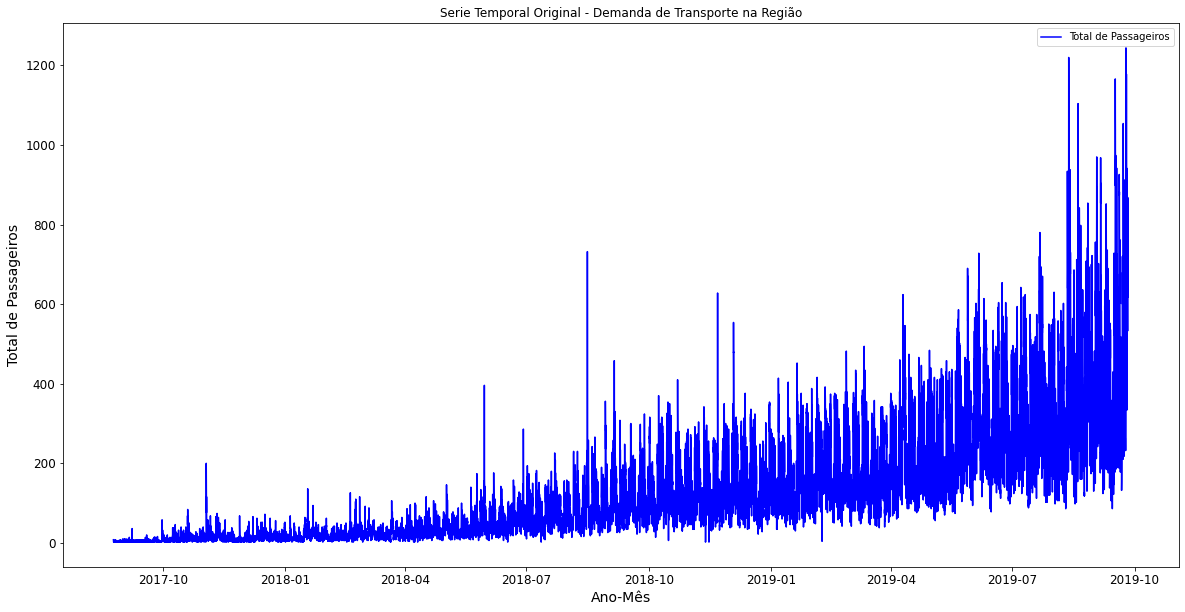

In [17]:
# Plot
plt.title("Serie Temporal Original - Demanda de Transporte na Região")
plt.plot(target, label = "Total de Passageiros", color = 'blue')
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Passageiros")
plt.legend(loc = "best")

## Determinando o Valor do Parâmetro d para o Modelo ARIMA

O objetivo da diferenciação é tornar a série temporal estacionária.

Mas você precisa ter cuidado para não superestimar a série. Por isso, uma série super diferenciada ainda pode ser estacionária, o que, por sua vez, afetará os parâmetros do modelo.

Então, como determinar a ordem correta de diferenciação?

A ordem correta de diferenciação é a diferenciação mínima necessária para obter uma série quase estacionária que circula em torno de uma média definida e o gráfico ACF chega a zero rapidamente.

Se as autocorrelações forem positivas para muitos atrasos (10 ou mais), a série precisará ser diferenciada. Por outro lado, se a autocorrelação lag 1 em si for muito negativa, a série provavelmente será super diferenciada.

Se não for possível realmente decidir entre duas ordens de diferenciação, então escolha a ordem que apresenta o menor desvio padrão na série diferenciada.

Vamos ver como fazer isso com um exemplo.

Primeiro, vou verificar se a série é estacionária usando o teste Augmented Dickey Fuller (adfuller()), do pacote statsmodels ( que já usamos em várias aulas até aqui).

Por quê?

Porque você precisa diferenciar apenas se a série não for estacionária. Senão, nenhuma diferenciação é necessária, ou seja, d = 0.

A hipótese nula do teste ADF é que a série temporal não é estacionária. Portanto, se o valor-p do teste for menor que o nível de significância (0,05), você rejeitará a hipótese nula e poderá inferir que a série temporal é realmente estacionária.

Portanto, se o valor-p > 0,05, prosseguimos em busca da ordem da diferenciação.

Vamos aplicar o Teste ADF mais uma vez em nossa série:

In [18]:
# Test ADF
resultado = adfuller(dados_treino['Count'])
print('Estatística ADF: %f' % resultado[0])
print('Valor-p: %f' % resultado[1])

Estatística ADF: -4.456561
Valor-p: 0.000235


O valor-p é menor que 0.05, portanto, não precisamos calcular o valor de 'd'. Ou seja, d = 0 no Modelo ARIMA.

Entretanto, vamos fazer mais uma checagem. Vamos aplicar a diferenciação duas vezes a nossa série e comparar os gráficos ACF.

A função np.diff() aplica a diferenciação.

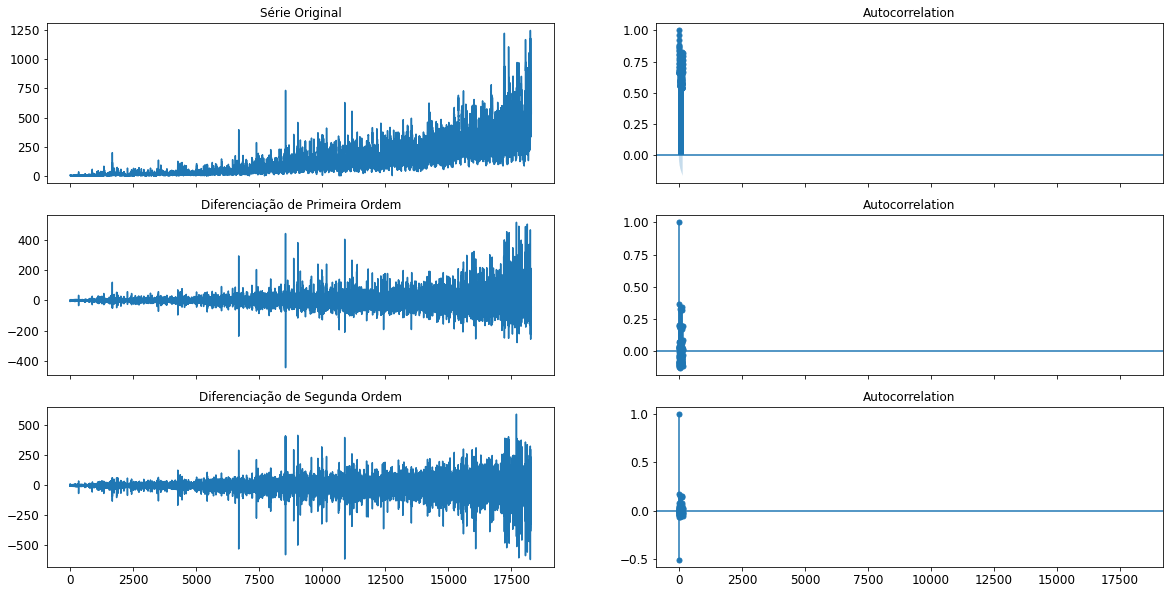

In [19]:
# Plotting Area
fig, axes = plt.subplots(3, 2, sharex = True)

# Original Series
axes[0, 0].plot(target.values); axes[0, 0].set_title('Série Original')
plot_acf(target.values, lags = 150, ax = axes[0, 1])

# First Order Differentiation
axes[1, 0].plot(np.diff(target.values)); axes[1 ,0].set_title('Diferenciação de Primeira Ordem')
plot_acf(np.diff(target.values), lags = 150, ax = axes[1,1])

# Second Order Differentiation
axes[2,0].plot(np.diff(np.diff(target.values))); axes[2 ,0].set_title('Diferenciação de Segunda Ordem')
plot_acf(np.diff(np.diff(target.values)), lags = 150, ax = axes[2, 1])

plt.show()

Fica claro que a Diferenciação de Primeira Ordem distribuiu melhor a série. Ou seja, o valor d = 1 parece ser uma boa opção para o Modelo ARIMA.

Mas a Diferenciação de Primeira Ordem e Segunda Ordem estão bem parecidas. Por que não d = 2?

Afinal, a série temporal atinge a estacionariedade com duas ordens de diferenciação. Mas, olhando para o gráfico de autocorrelação para a segunda diferencial, o atraso (lag) entra na zona negativa distante (-0.5) razoavelmente rápido, o que indica que a série pode ter sido super diferenciada.

Portanto, a Diferenciação de Primeira Ordem parece ser mesmo a melhor opção, mesmo que a série não seja perfeitamente estacionária (fraca estacionariedade). Ou seja, d = 1. 

Mas espere, tenho mais um teste com a função ndiffs:

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ndiffs.html

Não fique bravo(a), mas tudo que foi feito acima poderia ser testado com o comando abaixo....hehehe. Mas eu tinha que fazer meu trabalho e explicar as coisas para você. :-)

In [20]:
# test ADF
ndiffs(target, test = 'adf')

0

In [21]:
# Test KPSS
ndiffs(target, test ='kpss')

1

Ou seja, o Teste ADF indicou d = 0 e o Teste KPSS indicou d = 1.

Vamos escolher d = 1 pois vimos no gráfico a diferença quando aplicamos a primeira diferenciação. A escolha é sua meu caro(a) Cientista de Dados.

Já temos o I de ARIMA, o parâmetro d. Agora vamos encontrar o termo AR, com o parâmetro p.

## Determinando o Valor do Parâmetro p para o Modelo ARIMA

A próxima etapa é identificar se o modelo precisa de termos AR. Você pode descobrir o número necessário de termos AR, inspecionando o gráfico PACF (Partial Autocorrelation). Mas o que é PACF?

A autocorrelação parcial pode ser imaginada como a correlação entre a série e seu atraso, após excluir as contribuições dos atrasos intermediários. Portanto, o PACF meio que transmite a correlação pura entre um atraso e a série. Dessa forma, você saberá se esse atraso é necessário no termo AR ou não.

Qualquer autocorrelação em uma série estacionarizada pode ser retificada adicionando termos AR suficientes. Portanto, inicialmente consideramos a ordem do termo AR igual a tantas defasagens que ultrapassam o limite de significância no gráfico PACF.

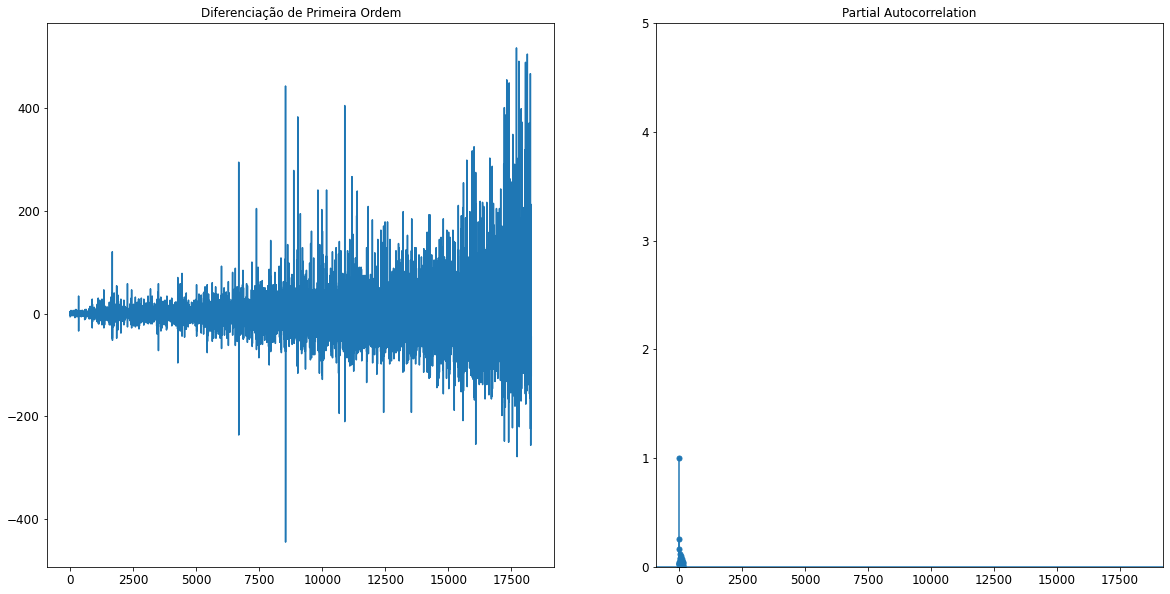

In [22]:
#Plot PACF

fis, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(np.diff(target.values))
axes[0].set_title('Diferenciação de Primeira Ordem')
axes[1].set(ylim = (0,5))
plot_pacf(np.diff(target.values), lags = 150, ax = axes[1])
plt.show()

Humm... O gráfico PACF não está ajudando muito. Tudo bem, tenho mais uma ferramenta aqui na manga. Sabe como é. Quanto mais ferramentas você conhece, mais problemas você é capaz de resolver.

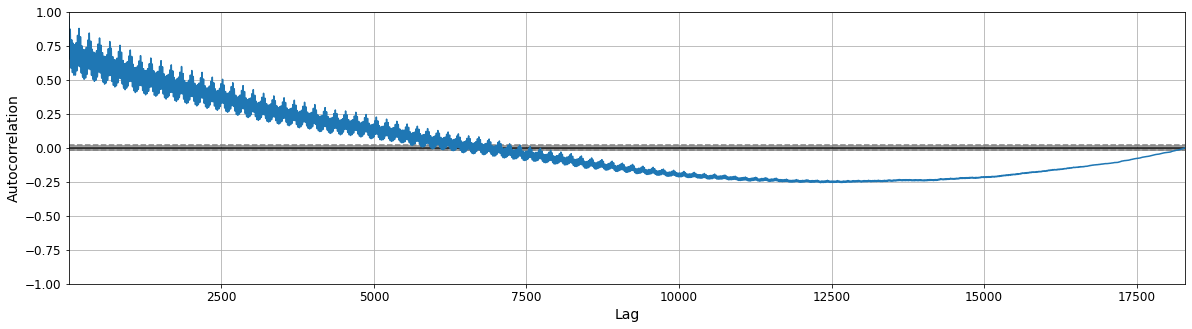

In [23]:
# Autocorrelation Plot
plt.figure(figsize = [20,5])
autocorrelation_plot(target)
plt.show()

Você pode observar que o atraso (lag) 1 é bastante significativo, pois está bem acima da linha de significância. O atraso 2 também é significativo, conseguindo ultrapassar o limite de significância. Mas vou ser conservador e definir o valor do parâmetro p igual a 1. Já temos o termo AR. Falta um.

## Determinando o Valor do Parâmetro q para o Modelo ARIMA

Assim como observamos o gráfico PACF para o número de termos AR, você pode observar para o gráfico ACF para o número de termos MA. Um termo MA é tecnicamente o erro da previsão atrasada.

O ACF informa quantos termos MA são necessários para remover qualquer autocorrelação na série estacionarizada.

Vamos ver o gráfico de autocorrelação das séries diferenciadas.

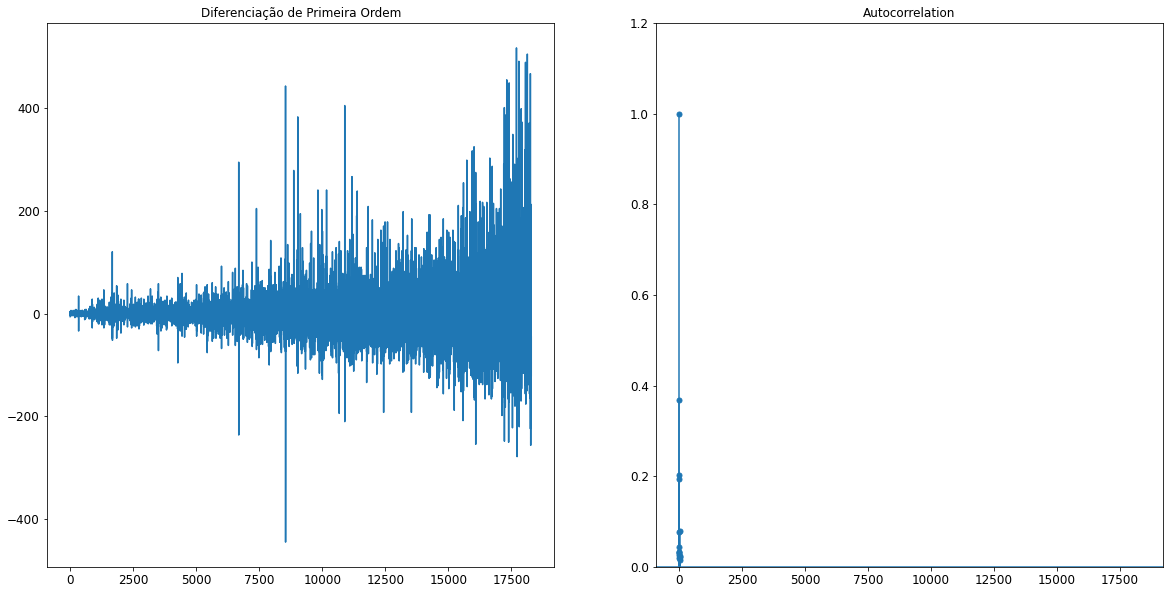

In [24]:
# Plot ACF

fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(np.diff(target.values))
axes[0].set_title('Diferenciação de Primeira Ordem')
axes[1].set(ylim = (0,1.2))
plot_acf(np.diff(target.values), ax = axes[1])
plt.show()

O gráfico de autocorrelação indica que temos pelo menos um valor acima do limite de 0.2. Ou seja, q = 1 é o mínimo que deveríamos testar, embora o q = 2 seja uma opção. Você pode testar as duas opções se desejar, mas eu vou escolher q = 1.

Para quem gosta de regras, aqui está uma lista completa:

https://people.duke.edu/~rnau/arimrule.htm


Já temos os 3 parâmetros para o Modelo ARIMA (p, d, q) - order(1, 1, 1).

Mas espere. Nós tínhamos criado o Modelo ARIMA na Aula 13 com order (2, 1, 0). Ok, vamos alterar o modelo e ver o que acontece.

Vamos preparar os dados para o modelo.


In [25]:
# Training data will be divided into training and validation data.
# Note that the records are separated in chronological order.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

In [26]:
# Applyng log transformation
df_treino_log = np.log(df_treino['Count'])

Agora aplicamos a diferenciação

In [27]:
# Using the shift function to move the series in 1 and calculate the difference
df_treino_log_diff = df_treino_log - df_treino_log.shift(1) 

Vamos criar nosso Modelo ARIMA.

## Forecasting - Modelagem Preditiva Para Séries Temporais

### Modelo ARIMA

Vamos criar nosso primeiro Modelo ARIMA. Para começar vamos criar um modelo simples, treiná-los e fazer previsões e nas aulas seguintes vamos explorar os detalhes de Modelos ARIMA, como interpretar o resultado, os resíduos e melhorar o modelo.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

In [28]:
# Create the ARIMA Model with order (1, 1, 1)
modelo_AR = ARIMA(df_treino_log, order  = (2,1,0), freq = 'H')

In [29]:
# Traning
modelo_v1 = modelo_AR.fit(disp = -1)

In [30]:
# Actual Data and Forecasts 
dados_reais = df_treino_log_diff
previsoes = modelo_v1.fittedvalues

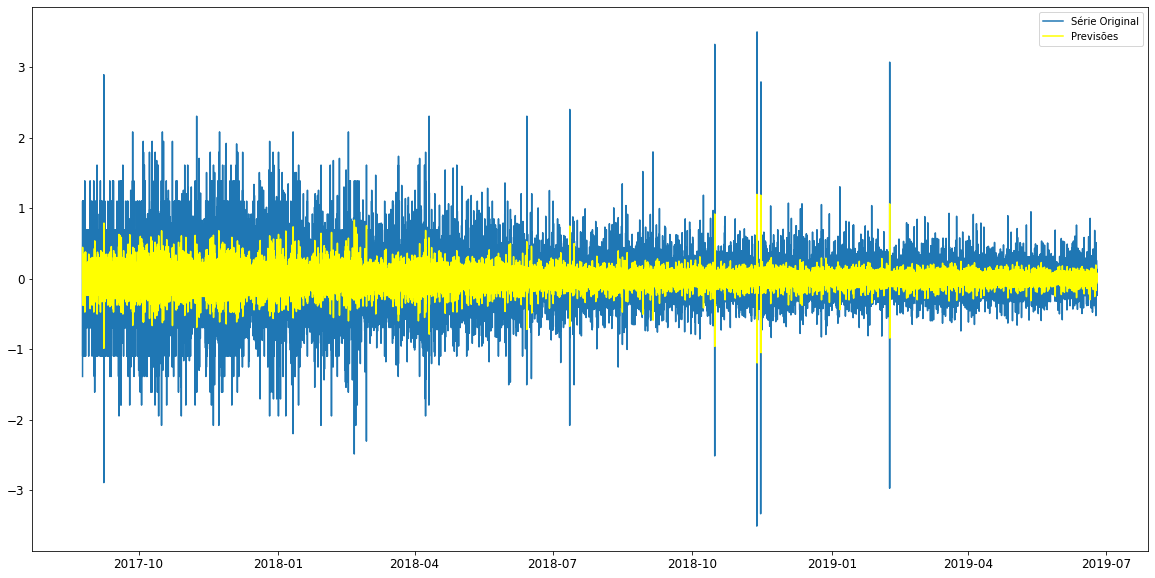

In [31]:
# Plot
plt.plot(dados_reais, label = 'Série Original') 
plt.plot(previsoes, color = 'yellow', label = 'Previsões') 
plt.legend(loc = 'best') 
plt.show()

Vamos fazer previsões com o modelo.

In [32]:
# Summary of the model - In the next classes we will interpret this summary of the model
modelo_v1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 16277.4337
Dependent Variable: D.Count          Log-Likelihood:      -8119.3   
Date:               2020-12-17 19:34 Scale:               1.0000    
No. Observations:   16056            Method:              css-mle   
Df Model:           3                Sample:              08-25-2017
Df Residuals:       16053                                 06-25-2019
Converged:          1.0000           S.D. of innovations: 0.401     
No. Iterations:     6.0000           HQIC:                16256.862 
AIC:                16246.6983                                      
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            0.0003    0.0022    0.1143  0.9090  -0.0041   0.0047
ar.L1.D.Count   -0.3419    0.0079  -43.4205  0.0000  -0.3573  -0.3265
ar.L2.D.Count   -0.0695    0.0079   -8.8300  0.0000  -0.0850  -0.0541
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -2.4583            -2.8874           3.7921            -0.3623
AR.2           -2.4583             2.8874           3.7921             0.3623
====================================================================

"""

Agora vamos fazer previsões com o modelo treinado.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html

In [44]:
# You know that the transformations applied to the training data must be applied  to the validation / test data.
df_valid_log = np.log(df_valid['Count'])

In [45]:
# Forecast 
# The alpha parameter reepresents the confidence interval, in this case, 95%
fc, se, conf = modelo_v1.forecast(len(df_valid), alpha = 0.05) 

In [36]:
# Forecasts
fc

array([5.85341812, 5.848469  , 5.8471654 , ..., 6.4184945 , 6.41875096,
       6.41900742])

In [37]:
# error
se

array([ 0.40121703,  0.48030433,  0.55749783, ..., 13.42013149,
       13.42314169, 13.42615122])

In [38]:
# Coefficients
conf

array([[  5.0670472 ,   6.63978905],
       [  4.90708981,   6.78984819],
       [  4.75448974,   6.93984106],
       ...,
       [-19.88447988,  32.72146888],
       [-19.89012332,  32.72762523],
       [-19.89576543,  32.73378026]])

In [46]:
# We need to create a dataframe to create the Plot
fc_series = pd.Series(fc, index = df_valid.index)
limite_inferior = pd.Series(conf[:, 0], index = df_valid.index)
limite_superior = pd.Series(conf[:, 1], index = df_valid.index)

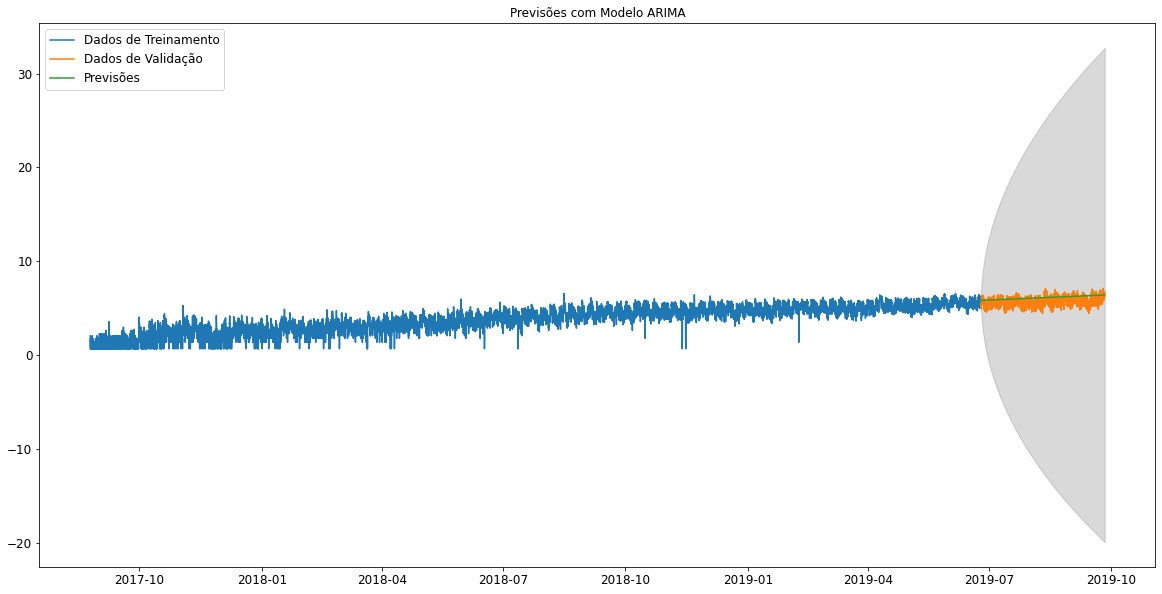

In [47]:
plt.plot(df_treino_log, label = 'Dados de Treinamento')
plt.plot(df_valid_log, label = 'Dados de Validação')
plt.plot(fc_series, label = 'Previsões')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

In [48]:
# Defines actual and predicted value
y_true = df_valid_log
y_pred = fc_series

In [50]:
# Calculates the error using RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

0.5577789477133491


Reduzimos ainda mais o erro do nosso modelo, apenas fazendo o estudo dos parâmetros ARIMA e escolhendo a melhor opção. Podemos usar até mesmo Cross Validation para isso.